The following chunks of code are a simple modification of Gerrychain's [Quick Start Guide][https://gerrychain.readthedocs.io/en/latest/user/quickstart.html]. Instead of using Propose_Random_Flip, we use Propose_Chunk_Flip, which is detailed in the documentation [here][https://gerrychain.readthedocs.io/en/latest/_modules/gerrychain/proposals/proposals.html]. In every iteration, a single boundary precinct and all of its neighbors are flipped from their current district to a contiguous district.

[https://gerrychain.readthedocs.io/en/latest/user/quickstart.html]:https://gerrychain.readthedocs.io/en/latest/user/quickstart.html

[https://gerrychain.readthedocs.io/en/latest/_modules/gerrychain/proposals/proposals.html]:https://gerrychain.readthedocs.io/en/latest/_modules/gerrychain/proposals/proposals.html

In [1]:
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges

In [2]:
graph = Graph.from_json("./data/PA_VTDs.json")

In [3]:
election = Election("SEN12", {"Dem": "USS12D", "Rep": "USS12R"})

In [4]:
initial_partition = Partition(
    graph,
    assignment="CD_2011",
    updaters={
        "cut_edges": cut_edges,
        "population": Tally("TOTPOP", alias="population"),
        "SEN12": election
    }
)

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [11]:
from gerrychain import MarkovChain
from gerrychain.constraints import single_flip_contiguous
from gerrychain.proposals import propose_chunk_flip
from gerrychain.accept import always_accept

In [12]:
chain = MarkovChain(
    proposal=propose_chunk_flip,
    constraints=[single_flip_contiguous],
    accept=always_accept,
    initial_state=initial_partition,
    total_steps=10000
)

In [13]:
d_percents = [partition["SEN12"].percents("Dem") for partition in chain]
r_percents = [partition["SEN12"].percents("Rep") for partition in chain]
d_df = pd.DataFrame(d_percents)
r_df = pd.DataFrame(r_percents)

The following chunk of code calculates the two extremes across all maps generated of the election results: For example, if the election code runs 10000 times, we calculate the total number of seats one by one party (Democrats in this cas) under each map. Then we take the min and the max to see how much impact Propose_Random_flip has on the election results. 

Since a larger number of precincts change districts after every iteration (compared to Propose_Random_Flip), we see a bigger impact on the election results

In [14]:
D_seats = np.zeros(len(chain))
R_seats = np.zeros(len(chain))

for j in range(len(chain)):
    d = 0
    r = 0
    for i in range(18):
        if d_df.loc[j][i] > r_df.loc[j][i]:
            d = d + 1
        else:
            r = r + 1
    D_seats[j] = d
    R_seats[j] = r
        
print(D_seats.max())
print(D_seats.min())
#print("Democrats win", d, "seats")
#print("Remocrats win", r, "seats")

10.0
7.0


The following chunck of code is also from the Quick start guide.

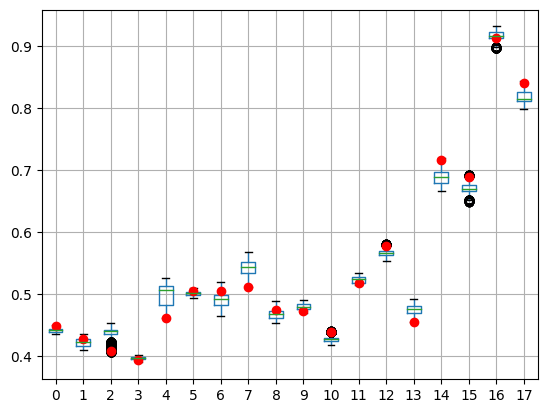

In [15]:
import matplotlib.pyplot as plt

ax = d_df.boxplot(positions=range(len(d_df.columns)))
plt.plot(d_df.iloc[0], "ro")

plt.show()

Even though the election results do not vary too much there's something potentially interesting going on: There seem to be a lot of variation within some districts.